# 配置图例

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('classic')

可以用 `plt.legend()` 命令来创建最简单的图例，它会自动创建一个包含每个图形元素的图例。

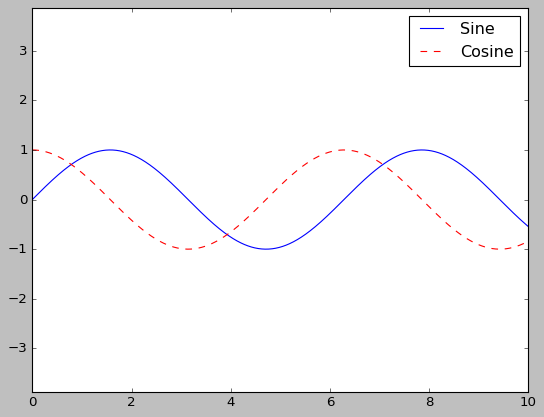

In [2]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b',  label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()

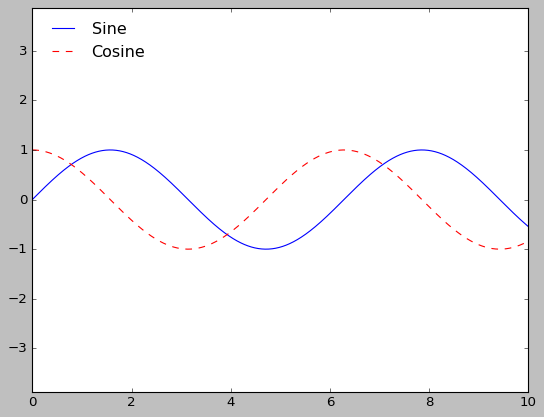

In [3]:
ax.legend(loc='upper left', frameon=False)  # 设置图例的位置，并取消外边框
fig

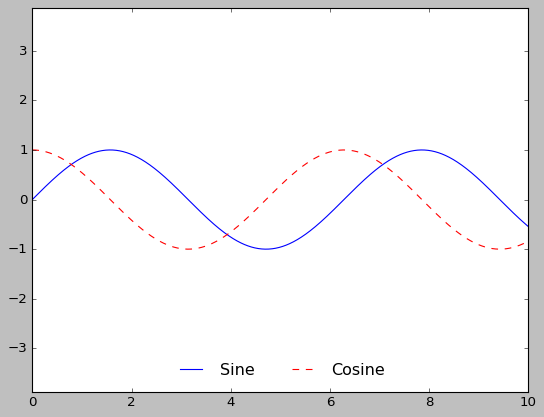

In [4]:
ax.legend(frameon=False, loc='lower center', ncol=2)  # 用 ncol 参数设置图例的标签列数
fig

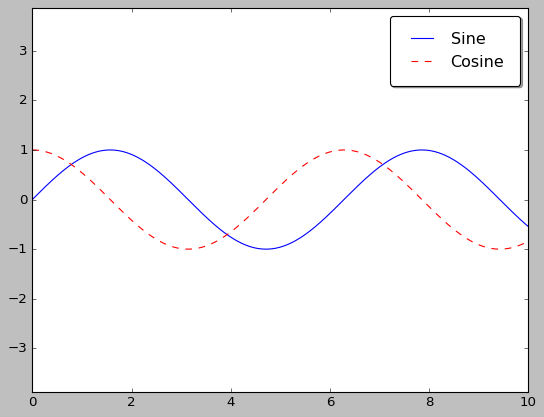

In [5]:
ax.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)  # 为图例定义圆角边框（fancybox）、增加阴影、改变外边框透明度（framealpha 值），或者改变文字间距
fig

## 1. 选择图例显示的元素

图例会默认显示所有元素的标签。如果你不想显示全部，可以通过一些图形命令来指定显示图例中的哪些元素和标签。  
`plt.plot()` 命令可以一次创建多条线，返回线条实例列表。
- 一种方法是将需要显示的线条传入 `plt.legend()`
- 另一种方法是只为需要在图例中显示的线条设置标签

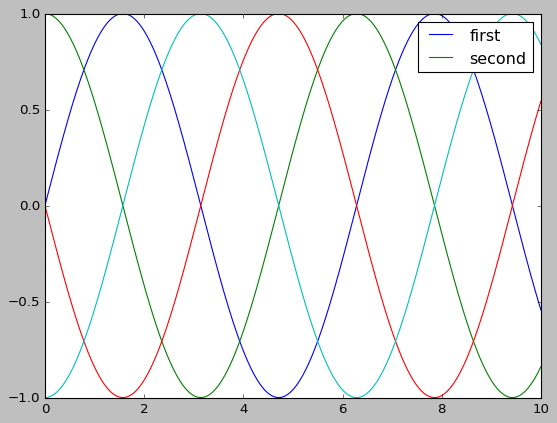

In [6]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines变量是一组plt.Line2D实例
plt.legend(lines[:2], ['first', 'second']);

In [7]:
x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5)

array([[0.00000000e+00, 1.57079633e+00, 3.14159265e+00, 4.71238898e+00],
       [1.00100100e-02, 1.58080634e+00, 3.15160266e+00, 4.72239899e+00],
       [2.00200200e-02, 1.59081635e+00, 3.16161267e+00, 4.73240900e+00],
       ...,
       [9.97997998e+00, 1.15507763e+01, 1.31215726e+01, 1.46923690e+01],
       [9.98998999e+00, 1.15607863e+01, 1.31315826e+01, 1.47023790e+01],
       [1.00000000e+01, 1.15707963e+01, 1.31415927e+01, 1.47123890e+01]])

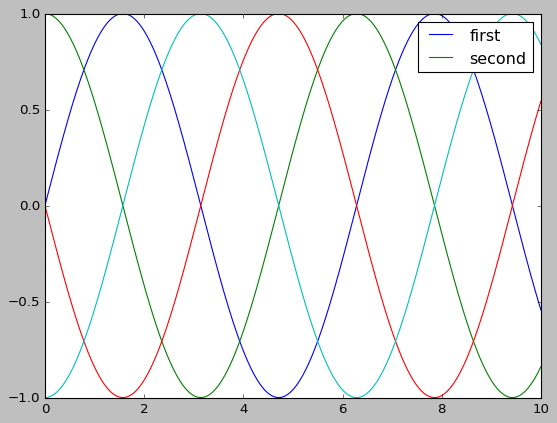

In [8]:
plt.plot(x, y[:, 0], label='first')   # 在实践中，我发现第一种方法更清晰。当然也可以只为需要在图例中显示的元素设置标签
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True)

## 2. 在图例中显示不同尺寸的点

有时，默认的图例仍然不能满足我们的可视化需求。例如，你可能需要用不同尺寸的点来表示数据的特征，并且希望创建这样的图例来反映这些特征。

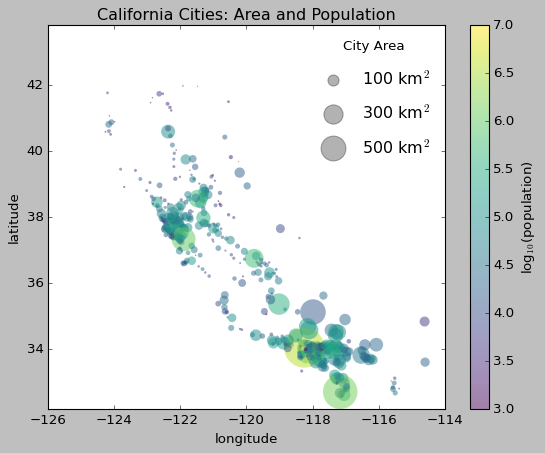

In [9]:
# 下面的示例将用点的尺寸来表明美国加州不同城市的人口数量。
# 如果我们想要一个通过不同尺寸的点显示不同人口数量级的图例，可以通过隐藏一些数据标签来实现这个效果
cities = pd.read_csv('../data/california_cities.csv')

# 提取感兴趣的数据
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# 用不同尺寸和颜色的散点图表示数据，但是不带标签
plt.scatter(lon, lat, label=None, c=np.log10(population), cmap='viridis', s=area, linewidth=0, alpha=0.5)
# plt.axis(aspect='equal')  # axis() got an unexpected keyword argument 'aspect'
plt.axis('equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# 下面创建一个图例：
# 画一些带标签和尺寸的空列表
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Area')
plt.title('California Cities: Area and Population');

由于图例通常是图形中对象的参照，因此如果我们想显示某种形状，就需要将它画出来。但是在这个示例中，我们想要的对象（灰色圆圈）并不在图形中，因此把它们用空列表假装画出来。还需要注意的是，图例只会显示带标签的元素。  
为了画出这些空列表中的图形元素，需要为它们设置标签，以便图例可以显示它们，这样就可以从图例中获得想要的信息了。这个策略对于创建复杂的可视化图形很有效。  
最后需要注意的是，在处理这类地理数据的时候，如果能把州的地理边界或其他地图元素也显示出来，那么图形就会更加逼真。`Matplotlib` 的 `Basemap`（底图）插件工具箱恰好是做这种事情的最佳选择，我们将在4.15 节介绍它。

## 3. 同时显示多个图例

有时，我们可能需要在同一张图上显示多个图例。不过，用 `Matplotlib` 解决这个问题并不容易，因为通过标准的 `legend` 接口只能为一张图创建一个图例。  
如果你想用 `plt.legend()` 或 `ax.legend()` 方法创建第二个图例，那么第一个图例就会被覆盖。  
但是，我们可以通过从头开始创建一个新的图例艺术家对象（`legend artist`），然后用底层的（`lowerlevel`） `ax.add_artist()` 方法在图上添加第二个图例。

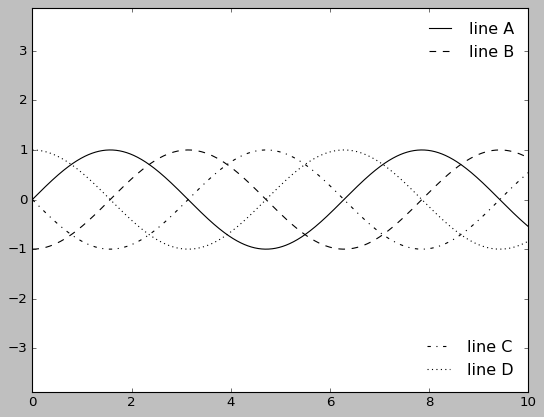

In [10]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), styles[i], color='black')
ax.axis('equal')

# 设置第一个图例要显示的线条和标签
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# 创建第二个图例，通过add_artist方法添加到图上
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg);